In [105]:
#The necessary libraries are imported

from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.table import Table, vstack
import pandas as pd
import numpy as np
import glob 
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from astropy.io import fits

In [112]:
def eq(ele):
    
    # The script asks the user for the coordinates and radius
    
    ra,dec,radius = None,None,None
    
    while ra is None or not (180 <= ra <= 300):
        try:
            ra = float(input("Enter the RA coordinate in degrees (180 to 300): "))
        except ValueError:
            print("You must enter a number")
        
    while dec is None or not (-80 <= dec <= 0):
        try:
            dec = float(input("Enter the DEC coordinate in degrees (-80 to 0): "))
        except ValueError:
            print("You must enter a number")
            
    while radius is None or not (0. <= radius <= 10.):
        try:
            radius = float(input("Enter the radius in degrees (0 to 10): "))
        except ValueError:
            print("You must enter a number")
    
    #transformación de la coordenada ingresada
    coord_eq = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs')
    
    return(coord_eq, radius)

def gal(ele):
    
    # The script asks the user for the coordinates and radius
    
    l, b, radius = None,None,None
    
    while l is None or not (0 <= l <= 360):
        try:
            l = float(input("Enter the galactic longitude in degrees (0 to 360): "))
        except ValueError:
            print("You must enter a number")
        
    while b is None or not (-15 <= b <= 10):
        try:
            b = float(input("Enter the galactic latitude in degrees (-15 to 10): "))
        except ValueError:
            print("You must enter a number")
            
    while radius is None or not (0. <= radius <= 10.):
        try:
            radius = float(input("Enter the radius in degrees (0 to 10): "))
        except ValueError:
            print("You must enter a number")
        
    coord_gal = SkyCoord(l=l*u.deg, b=b*u.deg, frame='galactic')
    
    return(coord_gal, radius)

#######################################################################

def loop_coordinates(files, coordinate_type, c_user, radius):
    # List of sources to find
    selected_data = []
    
    # List of files to use
    file_names = []
    
    for filename in files:
        with fits.open(filename) as hdul:
            data = Table(hdul[1].data)
            
            # Find sources within the coordinates range specified by the user
            # Convert the coordinates of each source to SkyCoord objects
            if coordinate_type == "Equatorial":
                coord = SkyCoord(ra=data['ra']*u.deg, dec=data['dec']*u.deg, frame='icrs')
            elif coordinate_type == "Galactic":
                coord = SkyCoord(l=data['l']*u.deg, b=data['b']*u.deg, frame='galactic')
            
            # Calculate the angular distance between the user's coordinates and the coordinates of the file
            sep = coord.separation(c_user)
            
            # Select table rows that are within the radius specified by the user
            selected_data_file = data[sep <= radius*u.deg]
            
            # Add found sources to selected_data
            if len(selected_data_file) > 0:
                selected_data.append(selected_data_file)
                file_names.append(filename)
        
    # Concatenate selected data into a single table
    selected_data_all = vstack(selected_data)
    
    return (file_names, selected_data_all)


In [126]:
def repetead_v(ele, con_data):
    
    # Verificar valores repetidos en las listas
    
    if ele == "Equatorial":
        lis1 = con_data['ra']
        if len(lis1) != len(set(lis1)):
            print("There are repeated values in the list")
        else:
            print("There are NOT repeated values in the list")
            # The script writes the selected data to a new fits file
            con_data.write('new_file.fits', format='fits',overwrite=True)
    
    elif ele == "Galactic":
        lis2 = con_data['l']
        if len(lis2) != len(set(lis2)):
            print("There are repeated values in the list")
        else:
            print("There are NOT repeated values in the list")
            # The script writes the selected data to a new fits file
            con_data.write('new_file.fits', format='fits',overwrite=True)

In [136]:
def visual(ele, conca_data, radius):
    
    if ele == "Equatorial":
        
        # Convert the table to a pandas DataFrame
        df = conca_data.to_pandas()
        
        fig, ax = plt.subplots()
        ax.scatter(df['ra'], df['dec'], s=0.1)
        
        #Create a circle around the center defined by the coordinates entered by the user
        circle = Circle((ra, dec), radius, linestyle='--', edgecolor='black', facecolor='none')
        ax.add_artist(circle)


        ax.set_xlabel('RA (degrees)')
        ax.set_ylabel('DEC (degrees)')
        
        ax.set_xlim(ra - radius - 0.05, ra + radius + 0.05)
        ax.set_ylim(dec - radius - 0.05, dec + radius + 0.05)
        
        ax.set_title('Sources within {:.2f} degree radius'.format(radius))
        plt.show()
        
        # Print the number of selected sources
        print('Number of sources selected: {}'.format(len(df)))

    elif ele == "Galactic":
        # Convert the table to a pandas DataFrame
        df = conca_data.to_pandas()
        
        fig, ax = plt.subplots()
        ax.scatter(df['l'], df['b'], s=0.1)
        
        # Create a circle around the center defined by the coordinates entered by the user
        circle = Circle((l, b), radius, linestyle='--', edgecolor='black', facecolor='none')
        ax.add_artist(circle)

        ax.set_xlabel('Galactic Lontitude (degrees)')
        ax.set_ylabel('Galactic latitude (degrees)')
        
        ax.set_xlim(l - radius - 0.05, l + radius + 0.05)
        ax.set_ylim(b - radius - 0.05, b + radius + 0.05)
        
        ax.set_title('Sources within {:.2f} degree radius'.format(radius))
        plt.show()
        
        # Print the number of selected sources
        print('Number of sources selected: {}'.format(len(df)))


In [137]:
def total_map(ele, all_data):
    
    if ele == "Equatorial":
        
        # Convert the table to a pandas DataFrame
        mp = all_data.to_pandas()
        
        fig, ax = plt.subplots()
        ax.scatter(mp['ra'], mp['dec'], s=0.1)

        ax.set_xlabel('RA (degrees)')
        ax.set_ylabel('DEC (degrees)')
          
        # Print the number of selected sources
        print(f"The total number of sources in the sample: {len(mp)}")
        
        #print('Number of sources selected: {}'.format(len(mp)))

    elif ele == "Galactic":
        
        # Convert the table to a pandas DataFrame
        mp = all_data.to_pandas()
        
        # Filter the data for the first range: 0 < l < 50
        range1_data = mp[(mp['l'] > 0) & (mp['l'] < 50)]
   
        # Filter the data for the second range: 300 < l < 360
        range2_data = mp[(mp['l'] > 300) & (mp['l'] < 360)]

        # Create two subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

        # Plot the first range
        ax1.scatter(range1_data['l'], range1_data['b'], s=0.1)
        ax1.set_xlabel('Galactic Longitude (degrees)')
        ax1.set_ylabel('Galactic Latitude (degrees)')
        ax1.set_title('Range: 0 < l < 50')

        # Plot the second range
        ax2.scatter(range2_data['l'], range2_data['b'], s=0.1)
        ax2.set_xlabel('Galactic Longitude (degrees)')
        ax2.set_ylabel('Galactic Latitude (degrees)')
        ax2.set_title('Range: 300 < l < 360')
        
        # Print the number of selected sources
        total = len(range1_data) + len(range2_data)
        
        print(f"The total number of sources in the sample: {total}")

In [138]:
# Looking for the fits files in my directory
fits_files = glob.glob("*v1.fits")

Which coordinate system do you want to use? Enter 'Equatorial' or 'Galactic': Galactic
You have chosen the Galactic coordinate system.
Enter the galactic longitude in degrees (0 to 360): 8
Enter the galactic latitude in degrees (-15 to 10): 3
Enter the radius in degrees (0 to 10): 10
There are NOT repeated values in the list


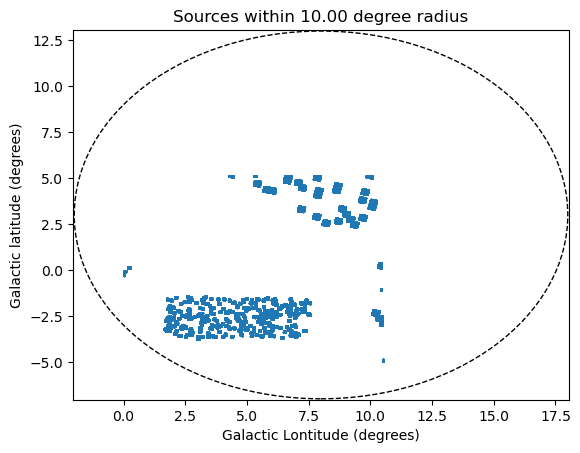

Number of sources selected: 3280742


In [144]:
elec = None

while elec not in ["Equatorial", "Galactic"]:
    elec = input("Which coordinate system do you want to use? Enter 'Equatorial' or 'Galactic': ")

if elec == "Equatorial":
    print("You have chosen the Equatorial coordinate system.")
    #primera función que pide ingresar los parámetros al usuario
    c_eq, r_eq = eq(elec)
    
    #con la siguiente función se seleccionan las fuentes dentro del radio ingresado
    #se entregan los nombres de estas fuentes y una lista de los datos obtenidos concadenatos 
    names_eq, con_data_eq = loop_coordinates(fits_files, elec, c_eq, r_eq)
    
    #Se verifica que no hayan fuentes repetidas 
    repetead_v(elec, con_data_eq)
    
    #Se visualizan las fuentes obtenidas
    visual(elec, con_data_eq, r_eq)
    
elif elec == "Galactic":
    print("You have chosen the Galactic coordinate system.")
    c_gal, r_gal = gal(elec)
    
    #segunda funcion
    names_gal, con_data_gal = loop_coordinates(fits_files, elec, c_gal, r_gal)
    
    #tercera funcion
    repetead_v(elec, con_data_gal)
    
    #cuarta funcion
    visual(elec, con_data_gal, r_gal)

In [66]:
con_data_eq

sourceid,astfit_epochs,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,chisq,uwe,l,b,phot_z_mean_mag,phot_z_std_mag,phot_z_n_phot,phot_y_mean_mag,phot_y_std_mag,phot_y_n_phot,phot_j_mean_mag,phot_j_std_mag,phot_j_n_phot,phot_h_mean_mag,phot_h_std_mag,phot_h_n_phot,phot_ks_mean_mag,phot_ks_std_mag,phot_ks_n_phot
int64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,int16,float32,float32,int16,float32,float32,int16,float32,float32,int16,float32,float32,int16
8524777000000,154,267.9785314117569,1.062311410623473,-20.79610826183436,1.0415851518427566,1.8909116748962347,1.1647036948292115,-2.918979167509343,0.6611933440389297,-6.564336227547436,0.6548888627376082,-0.01005822,0.3522127,0.5379849,-0.00425681,-0.028557232,-0.0111409305,0.4658464,0.39012644,-0.012085907,-0.004715032,405.22437,1.156449,7.716145579822719,2.9677785916455637,16.641953,0.009976575,6,15.985173,0.007560144,6,15.325366,0.007204435,6,14.608745,0.006030004,6,14.297239,0.044024523,154
8532970000006,178,268.05782325159475,0.5332547658916871,-20.847482007180957,0.5551469175345091,0.5766784025779821,0.6721146305373935,2.650627133400787,0.35259801801317053,-1.2255203872125722,0.3798870147958513,-0.008546191,0.25760952,0.29190624,-0.0032367446,-0.033174984,-0.0028797786,0.29118687,0.08680572,-0.012564539,-0.001090674,178.93718,0.71399754,7.709524648458002,2.877843480346312,13.715646,0.008207501,7,13.256476,0.008603186,8,12.9320545,0.02098594,8,12.639401,0.016493965,8,12.415435,0.014329382,158
8512489000008,157,268.0525118924726,1.1982279886825755,-20.654818451455526,1.21183696058679,2.156508479068734,1.3320488549111533,-2.4540955652078815,0.7516686574979943,-9.28298266798705,0.7540694436959117,-0.008911133,0.30453822,0.49716496,-0.003754764,-0.029261129,-0.009636547,0.45762894,0.3293293,-0.012329369,-0.004060422,359.75934,1.0790133,7.8732102360148515,2.9799263029384533,16.798841,0.023886692,6,16.173502,0.01427838,5,15.541055,0.0036642035,6,14.816814,0.009932087,6,14.502222,0.027462322,157
8512489000009,156,268.02130228174104,1.878270234792389,-20.629914308023732,1.8466408557177263,2.017677532859189,2.0790717389898785,0.2403749445313893,1.189817893424517,-21.710088397497625,1.183802182163197,-0.009264596,0.30259296,0.5012003,-0.004172509,-0.030617354,-0.009499512,0.4584875,0.3102656,-0.013789181,-0.0042783082,230.12187,0.8657844,7.879848548345081,3.017731803595574,17.378418,0.009340564,6,16.873022,0.014396717,6,16.328363,0.008897848,6,15.641009,0.016166467,6,15.409814,0.052146547,156
8508394000012,148,268.0603879734368,0.6900562708034229,-20.635229493798406,0.762836248895999,-0.6086349113727667,0.8408853561114519,-4.921174786647593,0.43429933036181045,-1.317853249223502,0.4822773063759555,-0.007627972,0.2420943,0.34020737,-0.003167527,-0.03150827,-0.00383229,0.3681112,0.12162807,-0.013083857,-0.0015913642,268.59662,0.9607354,7.893857220861542,2.9835185296853877,15.828273,0.011285947,6,15.111402,0.0074588996,5,14.39454,0.0089244675,6,13.57414,0.008929098,5,13.222134,0.08154143,148
8524777000013,155,267.9853575233781,2.812206220540269,-20.762561113143434,2.821956042059908,-4.25867218964872,3.183706691744997,-2.6129495936321208,1.762476548715162,5.7329483168513935,1.7245262378753012,-0.0068749846,0.2540007,0.4649107,-0.0036909503,-0.027066795,-0.009041941,0.43906558,0.33406028,-0.01453126,-0.004854317,247.45076,0.9007297,7.748326075483774,2.9793260951236324,17.657103,0.025013592,6,17.192253,0.022219107,5,16.63809,0.03278669,6,15.862538,0.037789814,6,15.608681,0.072045304,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [145]:
#Se concadenan los datos de todos los fits para realizar el mapa de todas las fuentes

total = []
file_names_2 = []

# Loop through each file
for filename in fits_files:
    with fits.open(filename) as hdul:
        data = Table(hdul[1].data)
        total.append(data)
        file_names_2.append(filename)

# Concatenate all the selected data into a single table
selected_data_all = vstack(total)

# Print the concatenated table
print(selected_data_all)

   sourceid   astfit_epochs ... phot_ks_std_mag phot_ks_n_phot
------------- ------------- ... --------------- --------------
8901664000002           575 ...      0.07251864            575
8901664000003           652 ...     0.054169454            652
8901664000013           407 ...     0.071528725            451
8901664000017           648 ...     0.045291275            648
8901664000018           601 ...     0.032006707            601
8901664000019           649 ...      0.03710479            649
8901664000023           638 ...      0.03602163            638
          ...           ... ...             ...            ...
9241616016074           337 ...      0.43004996            182
9241616016080           173 ...      0.54120445             86
9241616016082           144 ...      0.51044625             47
9241616016086           289 ...       0.3265382            245
9241616016091           284 ...       0.7361978            113
9241616016092           304 ...       0.4230812        

In [146]:
elec

'Galactic'

The total number of sources in the sample: 3338135


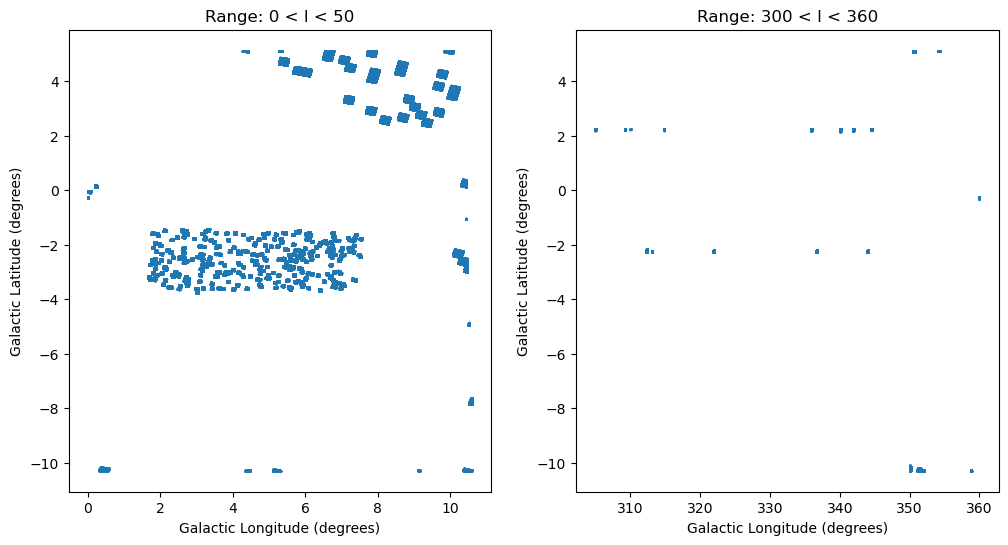

In [147]:
total_map(elec, selected_data_all)

In [32]:


# Adjust the spacing between subplots
#plt.tight_layout()

# Print the number of selected sources for each range
#print('Number of sources in Range 1: {}'.format(len(range1_data)))
#print('Number of sources in Range 2: {}'.format(len(range2_data)))


In [30]:
len(file_names_2)

366

In [11]:
# Convert the table to a pandas DataFrame
mp = selected_data_all.to_pandas()
mp

,sourceid,astfit_epochs,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,...,phot_y_n_phot,phot_j_mean_mag,phot_j_std_mag,phot_j_n_phot,phot_h_mean_mag,phot_h_std_mag,phot_h_n_phot,phot_ks_mean_mag,phot_ks_std_mag,phot_ks_n_phot
0,8901664000002,575,272.844628,0.410708,-24.500424,0.296230,0.150763,0.534736,0.565377,0.217792,...,5,14.101817,0.014535,5,12.979811,0.012564,5,12.535522,0.072519,575
1,8901664000003,652,272.821306,0.389738,-24.479069,0.290657,0.415445,0.509541,0.118218,0.203971,...,6,13.541814,0.008190,5,13.001578,0.014543,6,12.774318,0.054169,652
2,8901664000013,407,272.825243,1.325074,-24.528925,0.815741,10.728810,1.686505,-17.465321,0.598243,...,4,13.381348,0.009121,3,12.818351,0.088144,6,12.494309,0.071529,451
3,8901664000017,648,272.829306,0.639376,-24.525390,0.478203,1.729735,0.834021,-4.859207,0.357014,...,6,15.316821,0.031802,5,14.274986,0.017699,6,13.883745,0.045291,648
4,8901664000018,601,272.780763,0.416824,-24.493779,0.301648,1.037832,0.538581,-0.574900,0.212907,...,6,13.660342,0.009532,5,12.644354,0.017014,5,12.213566,0.032007,601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338130,9241616016082,144,271.443060,11.774355,-27.967024,5.975699,-260.250646,13.491720,-89.713700,4.799601,...,0,NaN,NaN,0,NaN,NaN,0,14.983916,0.510446,47
3338131,9241616016086,289,271.458710,8.690460,-27.983909,5.065795,483.303546,10.699010,-27.448338,3.688552,...,0,17.929750,0.000000,1,16.916891,0.000000,1,15.759041,0.326538,245
3338132,9241616016091,284,271.460254,7.457692,-27.981987,5.408827,-39.768843,8.810760,-245.966911,3.541872,...,0,NaN,NaN,0,15.169924,0.000000,1,14.915717,0.736198,113
3338133,9241616016092,304,271.434181,6.911851,-27.942745,4.647765,-504.064711,8.330716,7.622880,3.509171,...,0,NaN,NaN,0,15.614458,0.000000,1,15.235959,0.423081,283


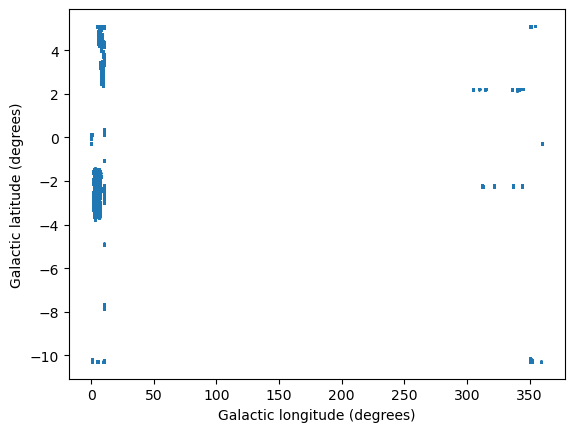

Number of sources selected: 3338135


In [33]:
# Graph the data
fig, ax = plt.subplots()
ax.scatter(mp['l'], mp['b'], s=0.1)

ax.set_xlabel('Galactic longitude (degrees)')
ax.set_ylabel('Galactic latitude (degrees)')

plt.show()

# Print the number of selected sources
print('Number of sources selected: {}'.format(len(mp)))

In [39]:
total_map(elec, selected_data_all)

NameError: name 'ele' is not defined